# Project - Statistical Performance Indicators (SPI)

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- What can Statistical Performance Indicators (SPI) tells us?
- Investigate regional SPI score
- SPI correlation with GDP per capita

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Explore the problem
- [Read about the SPI on World Bank](https://www.worldbank.org/en/programs/statistical-performance-indicators/about-spi)
    - The SPI measure the capacity and maturity of national statistical systems by assessing the use of data, the quality of services, the coverage of topics, the sources of information, and the infrastructure and availability of resources.
    - The goal is to improve development outcomes and track progress toward the Sustainable Development Goals.
- Could there be regional differences on SPI?
- Do we expect SPI to be correlated to GDP per capita?

### Step 1.b: Identify and download data
- The World bank has data for SPI and GDP per capita
    - The data is downloaded already, but you can find it here:
        - [SPI](https://data.worldbank.org/indicator/IQ.SPI.OVRL)
        - [GDP per capita](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

### Step 1.c: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd 

### Step 1.d: Read SPI data
- Use ```pd.read_csv()``` to read the files 
    - `files/SPI/API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv`
    - `files/SPI/Metadata_Country_API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv`
    - `files/SPI/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3159040.csv`
- NOTE: you might need to skip rows in some CSV files (`skiprows=4`)
- NOTE: Remember to assign the results to variables (e.g., `spi`, `meta`, `gdp`)
- Apply ```.head()``` on the data to see all is as expected

In [2]:
spi=pd.read_csv('files/API_SP/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv',skiprows=4,index_col=0)
meta=pd.read_csv('files/API_SP/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv',index_col=0)


### Step 1.e: Inspect the data
- Check the data is as expected
- HINT: use `.head()` on the DataFrames

In [3]:
spi.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [4]:
len(spi),len(meta)

(266, 265)

In [5]:
spi.shape

(266, 65)

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

In [6]:
meta.head()

,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
Country Code,,,,,
ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


### Step 2.a: Remove columns
- We will only focus on 2019 from `spi` and `gdp`
- Only keep `Country Code`, `2019` from `spi` and `gdp`
- On `meta` keep `Country Code` and `Region`

In [10]:
spi1=spi[['Country Code','2019']]


In [12]:
meta.index.names=['Country Code']

In [16]:
meta1=meta['Region']

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- Use `len()` on DataFrame and on DataFrames where `dropna` is applied.

In [23]:
meta1.head()
meta1=pd.DataFrame(meta1)
meta1.head()

,Region
Country Code,
ABW,Latin America & Caribbean
AFE,NaN
AFG,South Asia
AFW,NaN
AGO,Sub-Saharan Africa


In [21]:
spi1.head()

,Country Code,2019
Country Name,,
Aruba,ABW,106310.0
Africa Eastern and Southern,AFE,660046272.0
Afghanistan,AFG,38041757.0
Africa Western and Central,AFW,446911598.0
Angola,AGO,31825299.0


### Step 2.c: Drop rows
- Use `dropna()` on `spi` and `gdp` to remove missing data

In [33]:
meta_clean=meta1.dropna()
meta_clean

,Region
Country Code,
ABW,Latin America & Caribbean
AFG,South Asia
AGO,Sub-Saharan Africa
ALB,Europe & Central Asia
AND,Europe & Central Asia
...,...
XKX,Europe & Central Asia
YEM,Middle East & North Africa
ZAF,Sub-Saharan Africa


In [30]:
spi_clean=spi1.dropna()

In [32]:
spi_clean

,Country Code,2019
Country Name,,
Aruba,ABW,106310.0
Africa Eastern and Southern,AFE,660046272.0
Afghanistan,AFG,38041757.0
Africa Western and Central,AFW,446911598.0
Angola,AGO,31825299.0
...,...,...
Kosovo,XKX,1788878.0
"Yemen, Rep.",YEM,29161922.0
South Africa,ZAF,58558267.0


### Step 2.d: Rename columns
- We need to rename `2019` columns appropriate
- Rename `2019` to `SPI` in `spi`
    - HINT: Use `.rename(columns={'2019': 'SPI'})`
- Rename `2019` to `GDP per capita` in `gdp`

In [36]:
spi_clean.rename(columns={'2019':'SPI'})

,Country Code,SPI
Country Name,,
Aruba,ABW,106310.0
Africa Eastern and Southern,AFE,660046272.0
Afghanistan,AFG,38041757.0
Africa Western and Central,AFW,446911598.0
Angola,AGO,31825299.0
...,...,...
Kosovo,XKX,1788878.0
"Yemen, Rep.",YEM,29161922.0
South Africa,ZAF,58558267.0


### Step 2.e: Merge data
- Use `merge` on `spi` with `gdp`
    - HINT: `spi.merge(gdp, how='inner', on='Country Code')`
    - HINT: Assign result to a new DataFrame (e.g., `dataset`)
- Use `merge` on `dataset` with `meta`
- Investigae length and head

In [45]:
test=spi_clean.merge(meta,how='inner', on='Country Code')

In [46]:
test.head()

,Country Code,2019,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,106310.0,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,660046272.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,38041757.0,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,446911598.0,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,31825299.0,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [55]:
test1=test.drop('Unnamed: 5', axis=1)
test1

,Country Code,2019,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,106310.0,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,660046272.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,38041757.0,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
3,AFW,446911598.0,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,31825299.0,Sub-Saharan Africa,Lower middle income,NaN,Angola
...,...,...,...,...,...,...
259,XKX,1788878.0,Europe & Central Asia,Upper middle income,NaN,Kosovo
260,YEM,29161922.0,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
261,ZAF,58558267.0,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
262,ZMB,17861034.0,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Visualize regional SPI
- Use `groupby(.)` on `Region` with `mean()`
- Create a bar plot on the mean SPI value

In [56]:
test1.groupby('Region').mean()

,2019
Region,
East Asia & Pacific,6.262386e+07
Europe & Central Asia,1.587603e+07
Latin America & Caribbean,1.539121e+07
Middle East & North Africa,2.174807e+07
North America,1.219958e+08
South Asia,2.294721e+08
Sub-Saharan Africa,2.347789e+07


### Step 3.b: Scatter plot SPI and GDP
- Create a scatter plot of `GDP per capita` on x-axis and `SPI` on y-axis.
- Try with logarithmic scale (add `logx=True` as argument.

<AxesSubplot:>

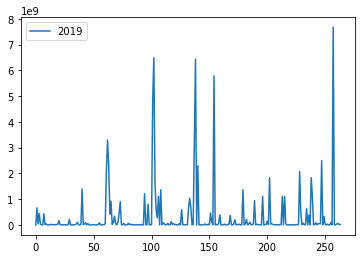

In [62]:
test1.plot.line()


## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Sort and make horizontal bar plot
- This will get you started in creating a plot
- Take the regional plot and sort it.
    - HINT: use `.sort_values(ascending=False)`
- Make the plot horizontal
    - HINT: use `.plot.barh()`
- Experiement further to find the plot you like

In [69]:
test1.sort_values(ascending=False,by='2019',inplace=False)

,Country Code,2019,Region,IncomeGroup,SpecialNotes,TableName
257,WLD,7.673345e+09,NaN,NaN,World aggregate.,World
102,IBT,6.486925e+09,NaN,NaN,IDA and IBRD total group aggregate (includes I...,IDA & IBRD total
138,LMY,6.434034e+09,NaN,NaN,NaN,Low & middle income
154,MIC,5.786163e+09,NaN,NaN,Middle income group aggregate. Middle-income e...,Middle income
101,IBD,4.816233e+09,NaN,NaN,IBRD only group aggregate.,IBRD only
...,...,...,...,...,...,...
83,GIB,3.370600e+04,Europe & Central Asia,High income,NaN,Gibraltar
253,VGB,3.003300e+04,Latin America & Caribbean,High income,NaN,British Virgin Islands
186,PLW,1.800100e+04,East Asia & Pacific,High income,Fiscal year ends on September 30; reporting pe...,Palau
243,TUV,1.165500e+04,East Asia & Pacific,Upper middle income,NaN,Tuvalu


### Step 4.b: Add colors to regional plot
- Create a series of the colors based on the regional categories.
    - HINT: Use `factorize()` and assign the first index ([docs](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html)).
- Make a color mapping in the scatter plot
    - HINT: Use argument `c=colors` (assuming you assigned the factorize result to `colors`
- Try to change color maps
    - HINT: Use `cmap='tab10'` (see other color maps in [docs](https://matplotlib.org/stable/tutorials/colors/colormaps.html))
- Play around until you get the plot you like

AttributeError: 'DataFrame' object has no attribute 'factorize'

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a: Insights
- Any insights?
- Actions we need to do?
- How to measure it?